IRIS DATASET



In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
iris = load_iris()
x=iris.data
y=iris.target
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

(i) Hold Out Method, Test size = 25%

In [4]:
k_size = 0.25
r_seeds = 100
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = k_size, random_state=r_seeds)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (112, 4)
Shape of X_test:  (38, 4)
Shape of y_train:  (112,)
Shape of y_test:  (38,)


Decision Tree Classification

In [5]:
deci_tree = DecisionTreeClassifier(criterion='entropy')
deci_tree.fit(X_train, y_train)
prediction=deci_tree.predict(X_test)

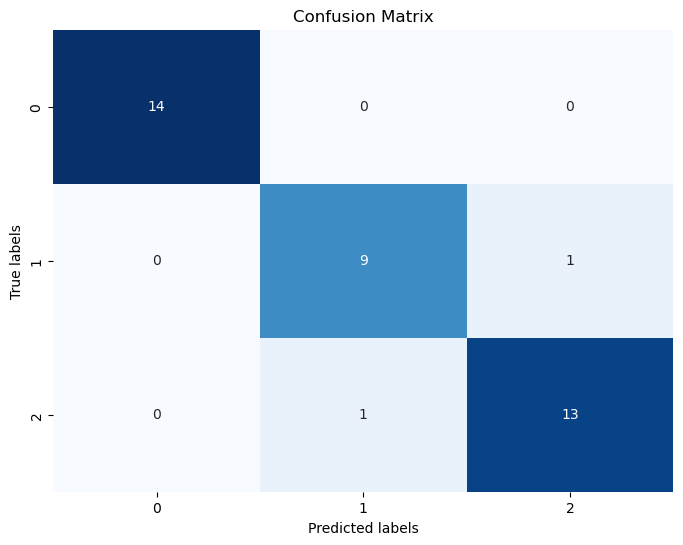

In [6]:
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4615384615384615

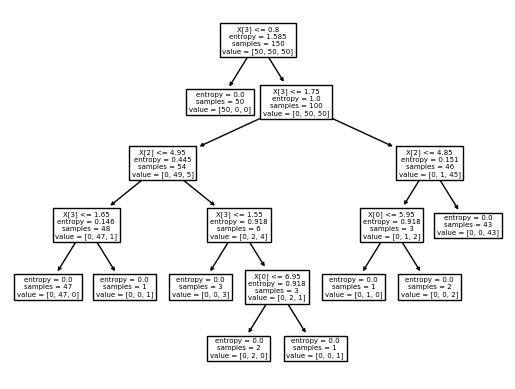

In [7]:
deci_tree = deci_tree.fit(iris.data, iris.target)
tree.plot_tree(deci_tree)

In [8]:
accuracy_dt = accuracy_score(y_test, prediction)
print("Accuracy on Hold Out method using classification:", accuracy_dt*100,"%")


Accuracy on Hold Out method using classification: 94.73684210526315 %


KNearest Neighbour Classification

In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)

C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [10]:
accuracy_knn = accuracy_score(y_test, prediction2)
print("Accuracy on Hold Out method using classification:", accuracy_knn*100,"%")


Accuracy on Hold Out method using classification: 97.36842105263158 %


Naive Bayes

In [11]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [12]:
prediction3 = nb.predict(X_test)

In [13]:
accuracy_nb = accuracy_score(y_test, prediction3)
print("Accuracy on Hold Out method using classification:", accuracy_nb*100,"%")

Accuracy on Hold Out method using classification: 94.73684210526315 %


(ii) Random Subsampling, Test Size = 25%

In [14]:

subsample_size = 25  

indices = np.random.choice(len(x), size=subsample_size, replace=True)

x_subsample = x[indices]
y_subsample = y[indices]

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

Decision Tree Classification

In [16]:
deci_tree1 = DecisionTreeClassifier(criterion='entropy')
deci_tree1.fit(x_subsample, y_subsample)
prediction = deci_tree.predict(x_subsample)

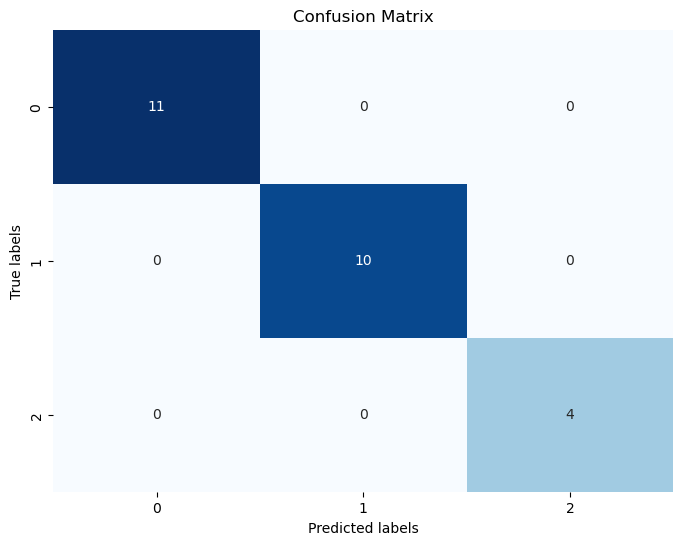

In [17]:
cm = confusion_matrix(y_subsample, prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4615384615384615

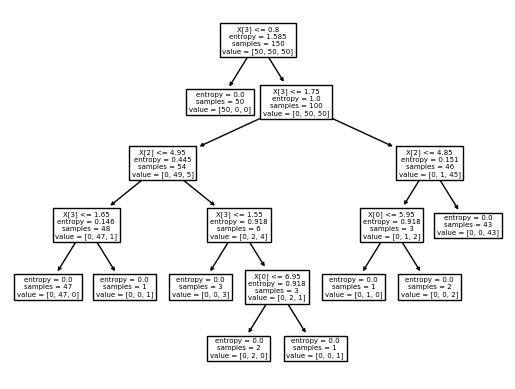

In [18]:
deci_tree1 = deci_tree1.fit(iris.data, iris.target)
tree.plot_tree(deci_tree1)

In [19]:
accuracy_dt = accuracy_score(y_subsample, prediction)
print("Accuracy on RANDOM SAMPLING  method using classification:", accuracy_dt*100,"%")

Accuracy on RANDOM SAMPLING  method using classification: 100.0 %


KNearest Neighbour Classification

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_subsample, y_subsample)
prediction2 = knn.predict(x_subsample)

C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
accuracy_dt = accuracy_score(y_subsample, prediction2)
print("Accuracy on RANDOM SAMPLING  method using classification:", accuracy_dt*100,"%")

Accuracy on RANDOM SAMPLING  method using classification: 96.0 %


NAIVE BAYES

In [22]:
nb = GaussianNB()
nb.fit(x_subsample,y_subsample )

GaussianNB()

In [23]:
prediction3 = nb.predict(x_subsample)

In [24]:
accuracy_dt = accuracy_score(y_subsample, prediction3)
print("Accuracy on RANDOM SAMPLING  method using classification:", accuracy_dt*100,"%")

Accuracy on RANDOM SAMPLING  method using classification: 100.0 %


cross validation

In [25]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(deci_tree, iris.data, iris.target, cv = 5)
mean_accuracy = scores.mean()

print("Accuracy on Cross Validation  method using classification:", mean_accuracy*100,"%")

Accuracy on Cross Validation  method using classification: 95.33333333333334 %


In [26]:
scores=cross_val_score(knn, iris.data, iris.target, cv = 5)
mean_accuracy2 = scores.mean()

print("Accuracy on Cross Validation  method using classification:", mean_accuracy2*100,"%")

Accuracy on Cross Validation  method using classification: 97.33333333333334 %


C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [27]:
scores=cross_val_score(nb, iris.data, iris.target, cv = 5)
mean_accuracy3 = scores.mean()

print("Accuracy on Cross Validation  method using classification:", mean_accuracy*100,"%")

Accuracy on Cross Validation  method using classification: 95.33333333333334 %
